In [118]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pysar.objects import timeseries
from pysar.utils import utils as ut, readfile, ptime, plot as pp
from pysar.simulation.plot import *

work_dir = os.path.expanduser('/media/lei/disk2/ErtaAle/20190606/SenDT79/PYSAR')
os.chdir(work_dir)
print('Go to directory', work_dir)

geom_file = './GEOCODE/geo_geometryRadar.h5'
ts_file = './GEOCODE/geo_timeseries_ECMWF_ramp_demErr.h5'

lat, lon = 13.468, 40.616


obj = timeseries(ts_file)
obj.open()

date_list = obj.dateList
dates = ptime.date_list2vector(date_list)[0]

coord = ut.coordinate(obj.metadata, lookup_file=geom_file)


Go to directory /media/lei/disk2/ErtaAle/20190606/SenDT79/PYSAR
open timeseries file: geo_timeseries_ECMWF_ramp_demErr.h5


NameError: name 'dis' is not defined

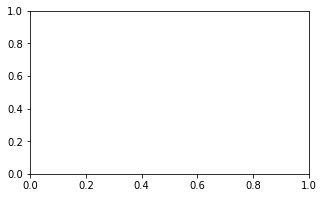

In [2]:
# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[5, 3])
ax.scatter(dates, dis, marker='^', s=6**2, facecolors='none', edgecolors='k', linewidth=1.)
# axis format
pp.auto_adjust_xaxis_date(ax, obj.times, fontsize=font_size)
ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
ax.set_xlabel('Time [yr]', fontsize=font_size)
ax.set_ylabel('LOS displacement [m]', fontsize=font_size)
# save
out_file = 'test.png'
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save to file: '+out_file)
plt.show()

In [119]:
print (dates)

[datetime.datetime(2017, 2, 9, 0, 0), datetime.datetime(2017, 2, 21, 0, 0), datetime.datetime(2017, 3, 5, 0, 0), datetime.datetime(2017, 3, 17, 0, 0), datetime.datetime(2017, 3, 29, 0, 0), datetime.datetime(2017, 4, 10, 0, 0), datetime.datetime(2017, 4, 22, 0, 0), datetime.datetime(2017, 5, 4, 0, 0), datetime.datetime(2017, 5, 16, 0, 0), datetime.datetime(2017, 6, 9, 0, 0), datetime.datetime(2017, 6, 21, 0, 0), datetime.datetime(2017, 7, 3, 0, 0), datetime.datetime(2017, 7, 15, 0, 0), datetime.datetime(2017, 7, 27, 0, 0), datetime.datetime(2017, 8, 8, 0, 0), datetime.datetime(2017, 8, 20, 0, 0), datetime.datetime(2017, 9, 1, 0, 0), datetime.datetime(2017, 9, 13, 0, 0), datetime.datetime(2017, 9, 25, 0, 0), datetime.datetime(2017, 10, 7, 0, 0), datetime.datetime(2017, 10, 19, 0, 0), datetime.datetime(2017, 10, 31, 0, 0), datetime.datetime(2017, 11, 12, 0, 0), datetime.datetime(2017, 11, 24, 0, 0), datetime.datetime(2017, 12, 6, 0, 0), datetime.datetime(2017, 12, 18, 0, 0), datetime.date

[13.638  13.5955 13.553  13.5105 13.468 ]
[40.63    40.66025 40.6905  40.72075 40.751  ]


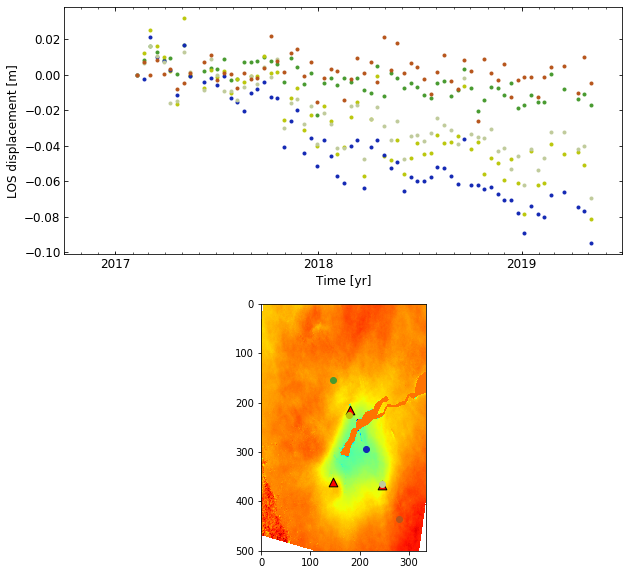

In [126]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[10, 10])
lat1, lon1 = 13.638,40.630
lat2, lon2 = 13.468,40.751

pts_num=5
y = np.array([lon1,lon2])
A = np.array([[lat1,1],[lat2,1]])
x = np.linalg.inv(A).dot(y)
intv_x = np.linspace(lat1,lat2,pts_num)
intv_y = intv_x*x[0]+x[1]
disMap = readfile.read(ts_file)
print(intv_x)
print(intv_y)
ax[1].imshow(disMap[0][-2],cmap='jet',zorder=1)
for ptsIdx in range(len(intv_y)):
    # axis format
    lat = intv_x[ptsIdx]
    lon = intv_y[ptsIdx]
    curCor = np.random.rand(1,3)
    y, x = coord.geo2radar(lat, lon)[0:2]
    box = (x, y, x+1, y+1)
    dis = readfile.read(ts_file, box=box)[0]
    #ax[0].scatter(dates, dis-dis[0], marker='.', s=6**2, facecolors='none', edgecolors=curCor, linewidth=1.)
    ax[0].plot(dates, dis-dis[0],'.',color = curCor[0])
    pp.auto_adjust_xaxis_date(ax[0], obj.times, fontsize=font_size)
    ax[0].tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
    ax[0].set_xlabel('Time [yr]', fontsize=font_size)
    ax[0].set_ylabel('LOS displacement [m]', fontsize=font_size)
    lat_y,lon_x = coord.geo2radar(lat, lon)[0:2]
    ax[1].scatter(lon_x,lat_y, c = curCor,zorder=3)
#fig.show()
mont_lalo = np.array([[13.601,40.662],[13.513,40.630],[13.510,40.721]])
mont_yx = coord.geo2radar(mont_lalo[:,0], mont_lalo[:,1])[0:2]
ax[1].scatter(mont_yx[1],mont_yx[0], s=75,c='r', marker='^',edgecolors='k',zorder=2)

out_file = 'test1.png'
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)


[13.652 13.606 13.56  13.514 13.468]
[40.679   40.66325 40.6475  40.63175 40.616  ]


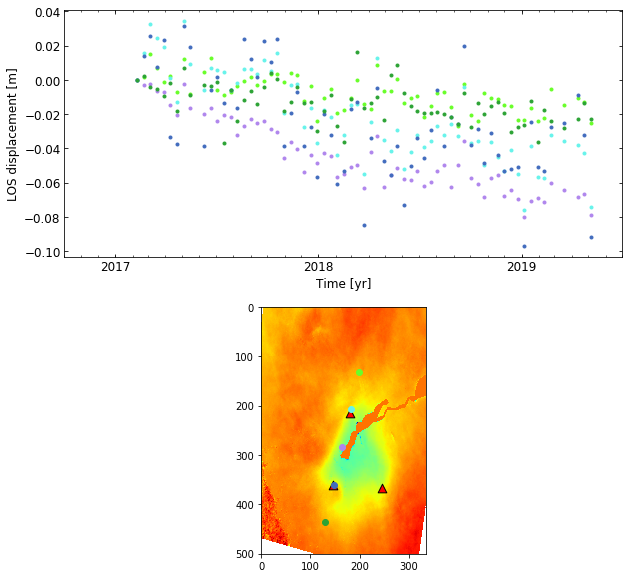

In [124]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[10, 10])
lat1, lon1 = 13.652,40.679 
lat2, lon2 = 13.468,40.616

pts_num=5
y = np.array([lon1,lon2])
A = np.array([[lat1,1],[lat2,1]])
x = np.linalg.inv(A).dot(y)
intv_x = np.linspace(lat1,lat2,pts_num)
intv_y = intv_x*x[0]+x[1]
disMap = readfile.read(ts_file)
print(intv_x)
print(intv_y)
ax[1].imshow(disMap[0][-2],cmap='jet',zorder=1)
for ptsIdx in range(len(intv_y)):
    # axis format
    lat = intv_x[ptsIdx]
    lon = intv_y[ptsIdx]
    curCor = np.random.rand(1,3)
    y, x = coord.geo2radar(lat, lon)[0:2]
    box = (x, y, x+1, y+1)
    dis = readfile.read(ts_file, box=box)[0]
    #ax[0].scatter(dates, dis-dis[0], marker='.', s=6**2, facecolors='none', edgecolors=curCor, linewidth=1.)
    ax[0].plot(dates, dis-dis[0],'.',color = curCor[0])
    pp.auto_adjust_xaxis_date(ax[0], obj.times, fontsize=font_size)
    ax[0].tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
    ax[0].set_xlabel('Time [yr]', fontsize=font_size)
    ax[0].set_ylabel('LOS displacement [m]', fontsize=font_size)
    lat_y,lon_x = coord.geo2radar(lat, lon)[0:2]
    ax[1].scatter(lon_x,lat_y, c = curCor,zorder=3)
#fig.show()
mont_lalo = np.array([[13.601,40.662],[13.513,40.630],[13.510,40.721]])
mont_yx = coord.geo2radar(mont_lalo[:,0], mont_lalo[:,1])[0:2]
ax[1].scatter(mont_yx[1],mont_yx[0], s=75,c='r', marker='^',edgecolors='k',zorder=2)

out_file = 'test2.png'
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)


[13.522  13.5175 13.513  13.5085 13.504 ]
[40.556  40.6095 40.663  40.7165 40.77  ]


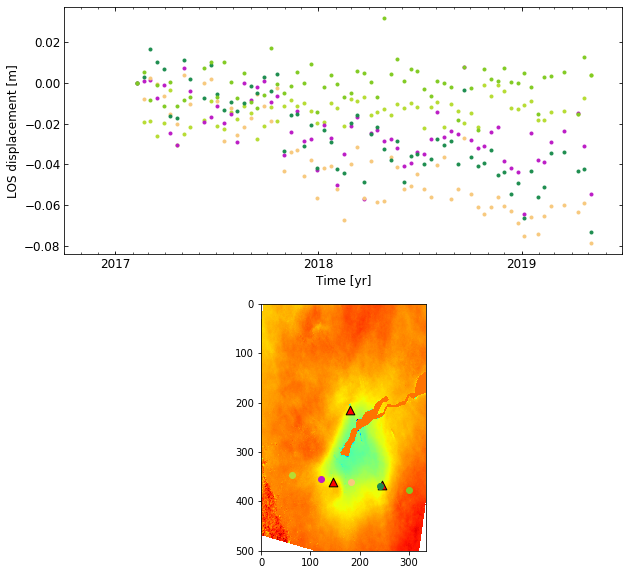

In [127]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[10, 10])
lat1, lon1 = 13.522,40.556
lat2, lon2 = 13.504,40.77
pts_num=5
y = np.array([lon1,lon2])
A = np.array([[lat1,1],[lat2,1]])
x = np.linalg.inv(A).dot(y)
intv_x = np.linspace(lat1,lat2,pts_num)
intv_y = intv_x*x[0]+x[1]
disMap = readfile.read(ts_file)
print(intv_x)
print(intv_y)
ax[1].imshow(disMap[0][-2],cmap='jet',zorder=1)
for ptsIdx in range(len(intv_y)):
    # axis format
    lat = intv_x[ptsIdx]
    lon = intv_y[ptsIdx]
    curCor = np.random.rand(1,3)
    y, x = coord.geo2radar(lat, lon)[0:2]
    box = (x, y, x+1, y+1)
    dis = readfile.read(ts_file, box=box)[0]
    #ax[0].scatter(dates, dis-dis[0], marker='.', s=6**2, facecolors='none', edgecolors=curCor, linewidth=1.)
    ax[0].plot(dates, dis-dis[0],'.',color = curCor[0])
    pp.auto_adjust_xaxis_date(ax[0], obj.times, fontsize=font_size)
    ax[0].tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
    ax[0].set_xlabel('Time [yr]', fontsize=font_size)
    ax[0].set_ylabel('LOS displacement [m]', fontsize=font_size)
    lat_y,lon_x = coord.geo2radar(lat, lon)[0:2]
    ax[1].scatter(lon_x,lat_y, c = curCor,zorder=3)
#fig.show()
mont_lalo = np.array([[13.601,40.662],[13.513,40.630],[13.510,40.721]])
mont_yx = coord.geo2radar(mont_lalo[:,0], mont_lalo[:,1])[0:2]
ax[1].scatter(mont_yx[1],mont_yx[0], s=75,c='r', marker='^',edgecolors='k',zorder=2)

out_file = 'test3.png'
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
